In [1]:
import utils
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt

In [2]:
def calculate_mean_cumulant(arr, Rnorm):
    '''
    arr - np.array of conformations
    Rnorm - float radius of giration threshold
    '''
    ret = [0] * arr[0].nBetas
    counter = 0
    for conf in arr:
        if conf.R_norm > Rnorm:
            break
        counter += 1
        for i in range(conf.nBetas):
            ret[i] += conf.U[i]
            
    U = [x / counter for x in ret]
    print(f'number of conformations {counter}')
    U_err = [0] * len(U)
    for conf in arr:
        if conf.R_norm > Rnorm:
            break
        for i in range(conf.nBetas):
            U_err[i] += (U[i] - conf.U[i])**2 / counter
    U_err = [np.sqrt(x) for x in U_err]
    return U, U_err

In [6]:
conf_250_close = utils.load_Conformations_from_dir('Conformations/L250_beta0.4_0.6_10/')
conf_1000_close = utils.load_Conformations_from_dir('Conformations/L1000_beta0.4_0.6_10/')
conf_500_close = utils.load_Conformations_from_dir('Conformations/L500_beta0.4_0.6_10/')

In [7]:
conf_250_close.sort(key=lambda x: x.R)
conf_500_close.sort(key=lambda x: x.R)
conf_1000_close.sort(key=lambda x: x.R)

In [8]:
@interact
def draw_cumulant_close(Rnorm = (0.43, 1.5, 0.01)):
    plt.figure()
    plt.title(Rnorm)
    betas = np.linspace(0.4, 0.6, 10)
    U_250, U_250_err = calculate_mean_cumulant(conf_250_close, Rnorm)
    U_500, U_500_err = calculate_mean_cumulant(conf_500_close, Rnorm)
    U_1000, U_1000_err = calculate_mean_cumulant(conf_1000_close, Rnorm)
    plt.errorbar(betas, U_250, yerr=U_250_err, fmt='o-', label='L=250')
    plt.errorbar(betas+0.001, U_500, yerr=U_500_err, fmt='o-', label='L=500')
    plt.errorbar(betas+0.002, U_1000, yerr=U_1000_err, fmt='o-', label='L=1000')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

interactive(children=(FloatSlider(value=0.96, description='Rnorm', max=1.5, min=0.43, step=0.01), Output()), _…

In [24]:
conf_250 = utils.load_Conformations_from_dir('Conformations/L250_beta0.1_1_10/')
conf_1000 = utils.load_Conformations_from_dir('Conformations/L1000_beta0.1_1_10/')
conf_500 = utils.load_Conformations_from_dir('Conformations/L500_beta0.1_1_10/')

In [25]:
conf_250.sort(key=lambda x: x.R)
conf_500.sort(key=lambda x: x.R)
conf_1000.sort(key=lambda x: x.R)

In [30]:
@interact
def draw_cumulant_close(Rnorm = (0.43, 1.5, 0.01)):
    plt.figure()
    plt.title(Rnorm)
    betas = np.linspace(0.1, 1.0, 10)
    U_250, U_250_err = calculate_mean_cumulant(conf_250, Rnorm)
    U_500, U_500_err = calculate_mean_cumulant(conf_500, Rnorm)
    U_1000, U_1000_err = calculate_mean_cumulant(conf_1000, Rnorm)
    plt.errorbar(betas, U_250, yerr=U_250_err, fmt='o-', label='L=250')
    plt.errorbar(betas, U_500, yerr=U_500_err, fmt='o-', label='L=500')
    plt.errorbar(betas, U_1000, yerr=U_1000_err, fmt='o-', label='L=1000')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

interactive(children=(FloatSlider(value=0.96, description='Rnorm', max=1.5, min=0.43, step=0.01), Output()), _…

In [3]:
conf_250_2 = utils.load_Conformations_from_dir('Conformations/L250_beta0.1_1_10(1000)/')
conf_1000_2 = utils.load_Conformations_from_dir('Conformations/L1000_beta0.1_1_10(1000)/')
conf_500_2 = utils.load_Conformations_from_dir('Conformations/L500_beta0.1_1_10(1000)/')

In [4]:
conf_250_2.sort(key=lambda x: x.R)
conf_500_2.sort(key=lambda x: x.R)
conf_1000_2.sort(key=lambda x: x.R)

In [5]:
%matplotlib inline
@interact
def draw_cumulant_close(Rnorm = (0.43, 1.5, 0.01)):
    plt.figure()
    plt.title(Rnorm)
    betas = np.linspace(0.4, 0.6, 10)
    U_250, U_250_err = calculate_mean_cumulant(conf_250_2, Rnorm)
    U_500, U_500_err = calculate_mean_cumulant(conf_500_2, Rnorm)
    U_1000, U_1000_err = calculate_mean_cumulant(conf_1000_2, Rnorm)
    plt.errorbar(betas, U_250, yerr=U_250_err, fmt='o-')
    plt.errorbar(betas, U_500, yerr=U_500_err, fmt='o-')
    plt.errorbar(betas, U_1000, yerr=U_1000_err, fmt='o-')
    plt.grid(True)
    plt.show()

interactive(children=(FloatSlider(value=0.96, description='Rnorm', max=1.5, min=0.43, step=0.01), Output()), _…

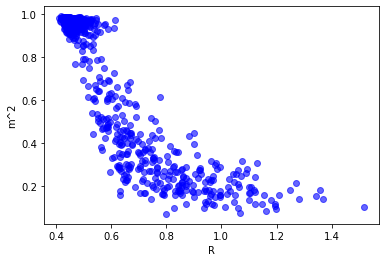

In [10]:
plt.figure()
plt.xlabel('R')
plt.ylabel('m^2')
for c in conf_500_2:
    plt.scatter(c.R_norm, c.mag2[-1].mean, color=(0, 0, 1, 0.6))
    
plt.show()

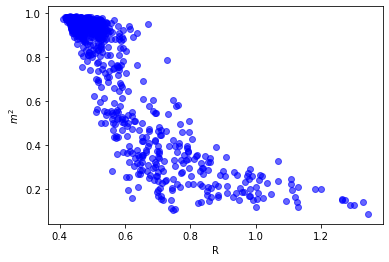

In [12]:
plt.figure()
plt.xlabel('R')
plt.ylabel('$m^2$')
for c in conf_250_2:
    plt.scatter(c.R_norm, c.mag2[-1].mean, color=(0, 0, 1, 0.6))
    
plt.show()

In [18]:
k = 0
for c in conf_250_2:
    if c.mag2[-1].mean > 0.75:
        print(f'R_norm={c.R_norm}, mag2={c.mag2[-1].mean}')
#         utils.draw_conformation(c.struct)
        k+=1

R_norm=0.4106008235605471, mag2=0.9736402894140164
R_norm=0.4146864984246817, mag2=0.981590795526808
R_norm=0.4176185465008327, mag2=0.9758147153356204
R_norm=0.419232953404233, mag2=0.9716797010631536
R_norm=0.419460663581169, mag2=0.9808282502770302
R_norm=0.42016894151667256, mag2=0.9749025439679703
R_norm=0.4202569785215753, mag2=0.9782685853479764
R_norm=0.42039133108158827, mag2=0.9719007352427532
R_norm=0.4205739095133271, mag2=0.9758060787074568
R_norm=0.4214012865536899, mag2=0.9808253485373757
R_norm=0.42151787188873613, mag2=0.9746554685350572
R_norm=0.4217497463389449, mag2=0.9592163746656808
R_norm=0.42258634401817935, mag2=0.9669614974437832
R_norm=0.42273626211815896, mag2=0.9776170064512875
R_norm=0.4234071002294524, mag2=0.9790553437964202
R_norm=0.42350118362863165, mag2=0.9710308510728014
R_norm=0.42609681021169976, mag2=0.9727755992857098
R_norm=0.42625528531761414, mag2=0.979585787850632
R_norm=0.426847561439026, mag2=0.9601122340816028
R_norm=0.42758043033465076, 

In [19]:
k

723